In [1]:
!pip install -q kaggle

In [2]:
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle

In [4]:
!kaggle datasets download -d harshsangrulkar/waste-classification

 93% 209M/226M [00:04<00:00, 73.8MB/s]
100% 226M/226M [00:04<00:00, 58.1MB/s]


In [5]:
!unzip /content/waste-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: DATASET/TRAIN/R/R_5000.jpg  
  inflating: DATASET/TRAIN/R/R_5001.jpg  
  inflating: DATASET/TRAIN/R/R_5002.jpg  
  inflating: DATASET/TRAIN/R/R_5003.jpg  
  inflating: DATASET/TRAIN/R/R_5004.jpg  
  inflating: DATASET/TRAIN/R/R_5005.jpg  
  inflating: DATASET/TRAIN/R/R_5006.jpg  
  inflating: DATASET/TRAIN/R/R_5007.jpg  
  inflating: DATASET/TRAIN/R/R_5008.jpg  
  inflating: DATASET/TRAIN/R/R_5009.jpg  
  inflating: DATASET/TRAIN/R/R_5010.jpg  
  inflating: DATASET/TRAIN/R/R_5011.jpg  
  inflating: DATASET/TRAIN/R/R_5012.jpg  
  inflating: DATASET/TRAIN/R/R_5013.jpg  
  inflating: DATASET/TRAIN/R/R_5014.jpg  
  inflating: DATASET/TRAIN/R/R_5015.jpg  
  inflating: DATASET/TRAIN/R/R_5016.jpg  
  inflating: DATASET/TRAIN/R/R_5017.jpg  
  inflating: DATASET/TRAIN/R/R_5018.jpg  
  inflating: DATASET/TRAIN/R/R_5019.jpg  
  inflating: DATASET/TRAIN/R/R_5020.jpg  
  inflating: DATASET/TRAIN/R/R_5021.jpg  
  inflating: DATASET/TRAI

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
trainpath = '/content/DATASET/TRAIN'
testpath = '/content/DATASET/TEST'

In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255,zoom_range= 0.2,shear_range= 0.2)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:
train = train_datagen.flow_from_directory(trainpath,target_size =(224,224),batch_size = 16)
test = test_datagen.flow_from_directory(testpath,target_size =(224,224),batch_size = 16)


Found 22564 images belonging to 3 classes.
Found 2907 images belonging to 3 classes.


In [10]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

In [11]:
vgg = VGG19(include_top = False,input_shape = (224,224,3))

80134624/80134624 [==============================] - 0s 0us/step


In [12]:
for layer in vgg.layers:
  print(layer)

In [14]:
len(vgg.layers)

22

In [15]:
for layer in vgg.layers:
  layer.trainable = False

In [16]:
x= Flatten()(vgg.output)

In [17]:
output = Dense(3, activation ='softmax')(x)

In [18]:
vgg19 = Model(vgg.input,output)

In [19]:
vgg19.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [20]:
vgg19.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics =['accuracy'])


In [22]:
vgg19.fit(train,validation_data=test,epochs=10,steps_per_epoch=len(train),validation_steps =len(test))

Epoch 1/10
1411/1411 [==============================] - 318s 226ms/step - loss: 0.6867 - accuracy: 0.7905 - val_loss: 0.7925 - val_accuracy: 0.7688
Epoch 2/10
1411/1411 [==============================] - 316s 224ms/step - loss: 0.5825 - accuracy: 0.8256 - val_loss: 0.9470 - val_accuracy: 0.7461
Epoch 3/10
1411/1411 [==============================] - 315s 223ms/step - loss: 0.5103 - accuracy: 0.8459 - val_loss: 0.9688 - val_accuracy: 0.7771
Epoch 4/10
1411/1411 [==============================] - 312s 221ms/step - loss: 0.4656 - accuracy: 0.8590 - val_loss: 1.4373 - val_accuracy: 0.6725
Epoch 5/10
1411/1411 [==============================] - 313s 222ms/step - loss: 0.4566 - accuracy: 0.8659 - val_loss: 1.4275 - val_accuracy: 0.7472
Epoch 6/10
1411/1411 [==============================] - 311s 221ms/step - loss: 0.4435 - accuracy: 0.8711 - val_loss: 1.6744 - val_accuracy: 0.7578
Epoch 7/10
1411/1411 [==============================] - 317s 224ms/step - loss: 0.4327 - accuracy: 0.8777 - val_

In [23]:
vgg19.save("garbage.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Testing

In [24]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [25]:
def resize_image(image, size=(256, 256)):
    return tensorflow.image.resize(image, size)

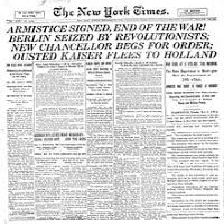

In [28]:
# testing 1

img = image.load_img('/content/DATASET/TRAIN/R/R_2849.jpg',target_size =(224,224))
img

In [29]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(vgg19.predict(x))
op =['Non-Recyclable','Organic','Recyclable']
op[pred]

1/1 [==============================] - 1s 796ms/step


'Recyclable'

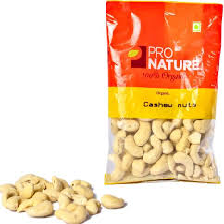

In [30]:
# testing 2

img = image.load_img('/content/DATASET/TRAIN/O/O_1000.jpg',target_size =(224,224))
img

In [31]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(vgg19.predict(x))
op =['Non-Recyclable','Organic','Recyclable']
op[pred]

1/1 [==============================] - 0s 18ms/step


'Organic'

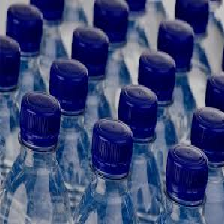

In [32]:
# testing 3

img = image.load_img('/content/DATASET/TRAIN/N/R_1011.jpg',target_size =(224,224))
img

In [33]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(vgg19.predict(x))
op =['Non-Recyclable','Organic','Recyclable']
op[pred]

1/1 [==============================] - 0s 19ms/step


'Non-Recyclable'